## Section One - Fundamentals of Risk & Returns

### Basics of Return

$$R_{t,t+1} = \frac{P_{t+1} - P_t}{P_t}$$

or alternatively

$R_{t,t+1} = \frac{P_{t+1}}{P_t} - 1$

In [161]:
prices_a = [8.70, 8.91, 8.71]

In [162]:
# 1st day to 2nd day return
8.91 / 8.70 - 1

0.024137931034482918

In [163]:
# 2nd day to 3rd day return
8.71 / 8.91 - 1

-0.022446689113355678

In [164]:
# all elements except first
prices_a[1:]

[8.91, 8.71]

In [165]:
# all elements except last
prices_a[:-1]

[8.7, 8.91]

In [166]:
import numpy as np

prices_a = np.array(prices_a)

prices_a

array([8.7 , 8.91, 8.71])

In [167]:
# daily returns

prices_a[1:] / prices_a[:-1] - 1

array([ 0.02413793, -0.02244669])

In [168]:
import pandas as pd

prices = pd.DataFrame({"BLUE": [8.70, 8.91, 8.71, 8.43, 8.73], "ORANGE":[10.66, 11.08, 10.71, 11.59, 12.11]})

prices

,BLUE,ORANGE
0,8.70,10.66
1,8.91,11.08
2,8.71,10.71
3,8.43,11.59
4,8.73,12.11


In [169]:
prices.shift(-1) / prices - 1

,BLUE,ORANGE
0,0.024138,0.039400
1,-0.022447,-0.033394
2,-0.032147,0.082166
3,0.035587,0.044866
4,NaN,NaN


In [170]:
prices / prices.shift(1) - 1

,BLUE,ORANGE
0,NaN,NaN
1,0.024138,0.039400
2,-0.022447,-0.033394
3,-0.032147,0.082166
4,0.035587,0.044866


In [171]:
prices.iloc[1:] / prices.iloc[:-1] - 1

,BLUE,ORANGE
0,NaN,NaN
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,NaN,NaN


In [172]:
prices.iloc[1:].values / prices.iloc[:-1] - 1

,BLUE,ORANGE
0,0.024138,0.039400
1,-0.022447,-0.033394
2,-0.032147,0.082166
3,0.035587,0.044866


In [173]:
prices.pct_change()

,BLUE,ORANGE
0,NaN,NaN
1,0.024138,0.039400
2,-0.022447,-0.033394
3,-0.032147,0.082166
4,0.035587,0.044866


In [174]:
prices = pd.read_csv("../data/sample_prices.csv")

prices

,BLUE,ORANGE
0,8.7000,10.6600
1,8.9055,11.0828
2,8.7113,10.7100
3,8.4346,11.5907
4,8.7254,12.1070
5,9.0551,11.7876
6,8.9514,11.2078
7,9.2439,12.5192
8,9.1276,13.3624
9,9.3976,14.4080


In [175]:
returns = prices.pct_change()

returns

,BLUE,ORANGE
0,NaN,NaN
1,0.023621,0.039662
2,-0.021807,-0.033638
3,-0.031763,0.082232
4,0.034477,0.044544
5,0.037786,-0.026381
6,-0.011452,-0.049187
7,0.032676,0.117008
8,-0.012581,0.067353
9,0.029581,0.078249


<Axes: >

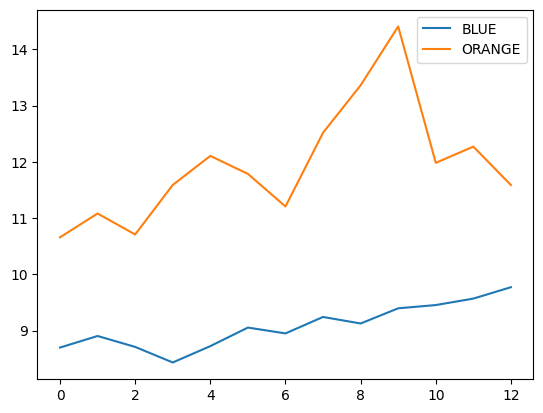

In [176]:
prices.plot()

<Axes: >

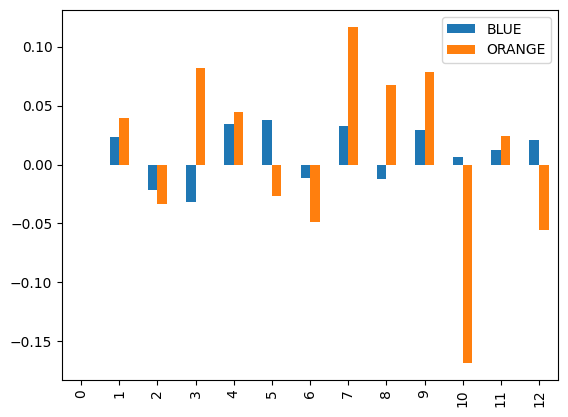

In [177]:
returns.plot.bar()

In [178]:
returns.std()

BLUE      0.023977
ORANGE    0.079601
dtype: float64

In [179]:
returns.mean()

BLUE      0.01
ORANGE    0.01
dtype: float64

In [180]:
returns + 1

,BLUE,ORANGE
0,NaN,NaN
1,1.023621,1.039662
2,0.978193,0.966362
3,0.968237,1.082232
4,1.034477,1.044544
5,1.037786,0.973619
6,0.988548,0.950813
7,1.032676,1.117008
8,0.987419,1.067353
9,1.029581,1.078249


#### Multiple period returns

$$R_{t, t+N} = (1 + R_{t,t+1})*...*(1 + R_{t+(N-1)},_{t+N}) - 1$$

In [181]:
np.prod(returns + 1) - 1

/Users/mac/Desktop/development/algo-trading/venv/lib/python3.12/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.prod with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


BLUE      0.123310
ORANGE    0.087167
dtype: float64

In [182]:
(np.prod(returns + 1) - 1) * 100

BLUE      12.331034
ORANGE     8.716698
dtype: float64

#### Annualizing Returns

$(1 + r)^N - 1$

$Annualized\ Return_{(monthly)} = (1 + r)^{12} - 1$

In [183]:
rm = 0.01

(1 + rm) ** 12 - 1

0.12682503013196977

In [184]:
rq = 0.04

(1 + rq) ** 4 - 1

0.1698585600000002

In [185]:
rd = 0.001

# approx 252 trading day in a year
(1 + rd) ** 252 - 1

0.28643404437615216

### Risk Adjusted Returns

#### Standard Deviation and Variation

Variance is the mean of the square of the deviations from its mean.

$$𝛔_{R}^{2} = \frac{1}{N} \sum(R_{i} - R_{avg})^2$$

*where:*

* $R_{avg} = arithmetic\ mean\ of\ the\ returns$

Standard deviation is simply the square root of the Variance.

$$𝛔_{R} = \sqrt{\frac{1}{N} \sum(R_{i} - R_{avg})^2}$$

In [186]:
prices = pd.read_csv("../data/sample_prices.csv")

returns = prices.pct_change() 

returns

,BLUE,ORANGE
0,NaN,NaN
1,0.023621,0.039662
2,-0.021807,-0.033638
3,-0.031763,0.082232
4,0.034477,0.044544
5,0.037786,-0.026381
6,-0.011452,-0.049187
7,0.032676,0.117008
8,-0.012581,0.067353
9,0.029581,0.078249


In [187]:
returns = returns.dropna()

returns

,BLUE,ORANGE
1,0.023621,0.039662
2,-0.021807,-0.033638
3,-0.031763,0.082232
4,0.034477,0.044544
5,0.037786,-0.026381
6,-0.011452,-0.049187
7,0.032676,0.117008
8,-0.012581,0.067353
9,0.029581,0.078249
10,0.006151,-0.168261


In [188]:
# to get a measure of risk (volatility), we can get the standard deviation

returns.std()

BLUE      0.023977
ORANGE    0.079601
dtype: float64

In [189]:
deviations = returns - returns.mean()

squared_deviations = deviations ** 2

variance = squared_deviations.mean()

# volatility (std) = variance ** 0.5
volatility = np.sqrt(variance)

volatility

BLUE      0.022957
ORANGE    0.076212
dtype: float64

In [190]:
returns.shape

(12, 2)

In [191]:
number_of_obs = returns.shape[0]
variance = squared_deviations.sum() / (number_of_obs - 1)

volatility = np.sqrt(variance)

volatility

BLUE      0.023977
ORANGE    0.079601
dtype: float64

#### Annualizing Volatility

$𝛔_{ann} = 𝛔_p\sqrt{p}$

*where:*

* **p = period**

Example

The Standard deviation of a stock daily return series is `.1%`,

$𝛔_{ann} = 0.001 * \sqrt{252} = 1.58\%$

In [192]:
returns.std() * np.sqrt(12)

BLUE      0.083060
ORANGE    0.275747
dtype: float64

In [193]:
returns = pd.read_csv("../data/Portfolios_Formed_on_ME_monthly_EW.csv", header=0, index_col=0, parse_dates=True, na_values=99.99)

returns

/var/folders/sw/bxz8j14j0gn9_prt5kh2xc4m0000gn/T/ipykernel_53821/28049897.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  returns = pd.read_csv("../data/Portfolios_Formed_on_ME_monthly_EW.csv", header=0, index_col=0, parse_dates=True, na_values=99.99)


,<= 0,Lo 30,Med 40,Hi 30,Lo 20,Qnt 2,Qnt 3,Qnt 4,Hi 20,Lo 10,Dec 2,Dec 3,Dec 4,Dec 5,Dec 6,Dec 7,Dec 8,Dec 9,Hi 10
192607,-99.99,-0.43,1.52,2.68,-0.57,0.59,1.60,1.47,3.33,-1.45,0.29,-0.15,1.33,1.24,1.98,1.55,1.38,3.38,3.29
192608,-99.99,3.90,3.04,2.09,3.84,3.59,3.71,1.61,2.33,5.12,2.59,4.03,3.15,2.72,4.72,1.60,1.63,0.98,3.70
192609,-99.99,-1.08,-0.54,0.16,-0.48,-1.40,0.00,-0.50,-0.09,0.93,-1.87,-2.27,-0.53,0.07,-0.07,-1.64,0.64,-0.86,0.67
192610,-99.99,-3.32,-3.52,-3.06,-3.29,-4.10,-2.89,-3.36,-2.95,-4.84,-1.77,-3.36,-4.83,-2.98,-2.80,-3.45,-3.27,-3.47,-2.43
192611,-99.99,-0.46,3.82,3.09,-0.55,2.18,3.41,3.39,3.16,-0.78,-0.32,-0.29,4.65,3.24,3.57,3.82,2.95,3.61,2.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201808,-99.99,3.47,4.04,2.87,3.09,5.05,3.90,3.54,2.49,2.41,5.07,5.30,4.70,3.02,5.01,3.50,3.58,2.65,2.34
201809,-99.99,-2.24,-1.85,0.08,-2.04,-2.38,-2.48,-0.74,0.19,-1.68,-3.08,-3.22,-1.23,-2.65,-2.27,-1.31,-0.12,-0.51,0.87
201810,-99.99,-10.76,-10.88,-7.63,-10.52,-11.74,-10.55,-9.45,-7.41,-10.02,-11.98,-11.89,-11.52,-11.58,-9.23,-10.74,-8.04,-8.28,-6.57
201811,-99.99,-2.08,2.18,2.19,-2.78,1.69,1.46,2.62,2.49,-3.65,-0.23,1.23,2.30,1.74,1.11,3.54,1.63,2.45,2.53


In [194]:
columns = ['Lo 10', 'Hi 10']

returns = returns[columns]

returns

,Lo 10,Hi 10
192607,-1.45,3.29
192608,5.12,3.70
192609,0.93,0.67
192610,-4.84,-2.43
192611,-0.78,2.70
...,...,...
201808,2.41,2.34
201809,-1.68,0.87
201810,-10.02,-6.57
201811,-3.65,2.53


In [195]:
returns = returns / 100

returns

,Lo 10,Hi 10
192607,-0.0145,0.0329
192608,0.0512,0.0370
192609,0.0093,0.0067
192610,-0.0484,-0.0243
192611,-0.0078,0.0270
...,...,...
201808,0.0241,0.0234
201809,-0.0168,0.0087
201810,-0.1002,-0.0657
201811,-0.0365,0.0253


In [196]:
returns.columns = ['SmallCap', 'LargeCap']

returns

,SmallCap,LargeCap
192607,-0.0145,0.0329
192608,0.0512,0.0370
192609,0.0093,0.0067
192610,-0.0484,-0.0243
192611,-0.0078,0.0270
...,...,...
201808,0.0241,0.0234
201809,-0.0168,0.0087
201810,-0.1002,-0.0657
201811,-0.0365,0.0253


<Axes: >

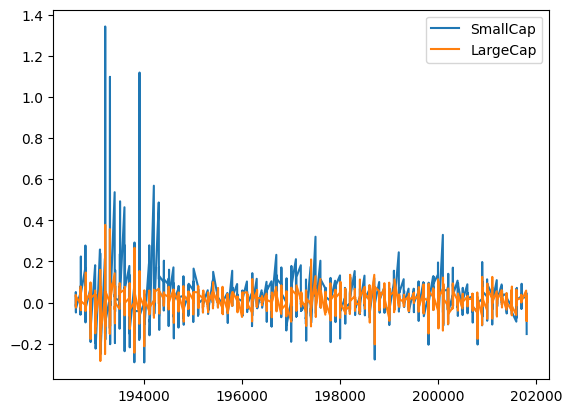

In [197]:
returns.plot()

In [198]:
annualized_vol = returns.std() * np.sqrt(12)

annualized_vol

SmallCap    0.368193
LargeCap    0.186716
dtype: float64

In [199]:
n_months = returns.shape[0]

return_for_all_months = (returns + 1).prod() # i.e (1 + r_1)*...*(1 + r_n_months)
print(return_for_all_months)

return_per_month = (returns + 1).prod() ** (1 / n_months) - 1

return_per_month

SmallCap    1.659583e+06
LargeCap    3.675948e+03
dtype: float64


SmallCap    0.012986
LargeCap    0.007423
dtype: float64

In [200]:
annualized_return = (return_per_month + 1) ** 12 - 1

annualized_return

SmallCap    0.167463
LargeCap    0.092810
dtype: float64

We can get `annualized_return` in one step by:

* getting the returns for all months
* raise it to the power of the quotient of `12` and `number of months` i.e `12 / n_months`
* subtract 1 so that it can be in the format of `(1 + r)`

In [335]:
annualized_return = (returns + 1).prod() ** (12 / n_months) - 1

annualized_return

SmallCap    0.167463
LargeCap    0.092810
dtype: float64

To measure Return on Risk ratio we do

$$Return\ on\ Risk\ ratio = \frac{Annualized\ Return}{Annualized\ Volatility}$$

In [336]:
annualized_return / annualized_vol

SmallCap    0.454825
LargeCap    0.497063
dtype: float64

##### What is **Sharpe ratio**?

$$Sharpe\ ratio = \frac{Excess\ return}{Annualized\ Volatility}$$

*Note:*

$Excess\ return = Annualized\ return\ -\ Risk\ free\ rate$

Hence, Sharpe ratio can be represented as

$Sharpe\ ratio = Return\ on\ Risk\ ratio - \frac{Risk free rate}{Annualized Volatility}$

In [337]:
risk_free_rate = 0.03 # 3% for US Treasury bonds or something
excess_return = annualized_return - risk_free_rate

sharpe_ratio = excess_return / annualized_vol

sharpe_ratio

SmallCap    0.373346
LargeCap    0.336392
dtype: float64

### Computing Drawdowns

/var/folders/sw/bxz8j14j0gn9_prt5kh2xc4m0000gn/T/ipykernel_53821/1756576871.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  me_m = pd.read_csv("../data/Portfolios_Formed_on_ME_monthly_EW.csv", header=0, index_col=0, parse_dates=True, na_values=-99.99)


<Axes: >

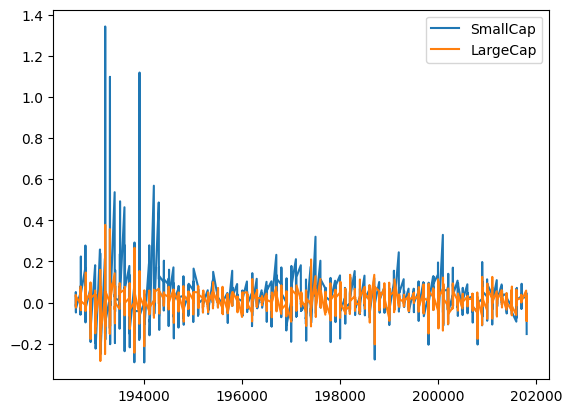

In [338]:
me_m = pd.read_csv("../data/Portfolios_Formed_on_ME_monthly_EW.csv", header=0, index_col=0, parse_dates=True, na_values=-99.99)

returns = me_m[["Lo 10", "Hi 10"]]
returns.columns = ['SmallCap', 'LargeCap']
returns = returns / 100

returns.plot.line()

In [339]:
returns.head()

,SmallCap,LargeCap
192607,-0.0145,0.0329
192608,0.0512,0.0370
192609,0.0093,0.0067
192610,-0.0484,-0.0243
192611,-0.0078,0.0270


In [340]:
returns.index

Index([192607, 192608, 192609, 192610, 192611, 192612, 192701, 192702, 192703,
       192704,
       ...
       201803, 201804, 201805, 201806, 201807, 201808, 201809, 201810, 201811,
       201812],
      dtype='int64', length=1110)

In [341]:
returns.index = pd.to_datetime(returns.index, format="%Y%m")

returns

,SmallCap,LargeCap
1926-07-01,-0.0145,0.0329
1926-08-01,0.0512,0.0370
1926-09-01,0.0093,0.0067
1926-10-01,-0.0484,-0.0243
1926-11-01,-0.0078,0.0270
...,...,...
2018-08-01,0.0241,0.0234
2018-09-01,-0.0168,0.0087
2018-10-01,-0.1002,-0.0657
2018-11-01,-0.0365,0.0253


In [342]:
returns.index

DatetimeIndex(['1926-07-01', '1926-08-01', '1926-09-01', '1926-10-01',
               '1926-11-01', '1926-12-01', '1927-01-01', '1927-02-01',
               '1927-03-01', '1927-04-01',
               ...
               '2018-03-01', '2018-04-01', '2018-05-01', '2018-06-01',
               '2018-07-01', '2018-08-01', '2018-09-01', '2018-10-01',
               '2018-11-01', '2018-12-01'],
              dtype='datetime64[ns]', length=1110, freq=None)

In [343]:
returns.index = returns.index.to_period("M")

returns.head()

,SmallCap,LargeCap
1926-07,-0.0145,0.0329
1926-08,0.0512,0.0370
1926-09,0.0093,0.0067
1926-10,-0.0484,-0.0243
1926-11,-0.0078,0.0270


<Axes: >

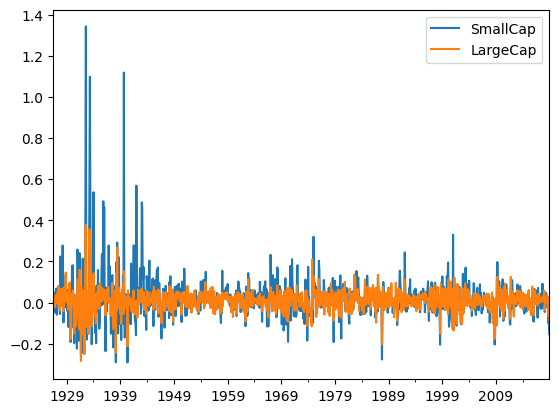

In [344]:
returns.plot.line()

In [345]:
returns.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 1110 entries, 1926-07 to 2018-12
Freq: M
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SmallCap  1110 non-null   float64
 1   LargeCap  1110 non-null   float64
dtypes: float64(2)
memory usage: 26.0 KB


#### Steps to computing drawdowns

1. Compute a wealth index
2. Compute previous index
3. Compute drawdown - which is the wealth value as a percentage of the previous peak

In [346]:
wealth_index = 1000 * (1 + returns['LargeCap']).cumprod()

wealth_index

1926-07    1.032900e+03
1926-08    1.071117e+03
1926-09    1.078294e+03
1926-10    1.052091e+03
1926-11    1.080498e+03
               ...     
2018-08    4.175915e+06
2018-09    4.212246e+06
2018-10    3.935501e+06
2018-11    4.035069e+06
2018-12    3.675948e+06
Freq: M, Name: LargeCap, Length: 1110, dtype: float64

In [347]:
1000 * (1 + returns["LargeCap"]).prod()

3675948.0854032855

<Axes: >

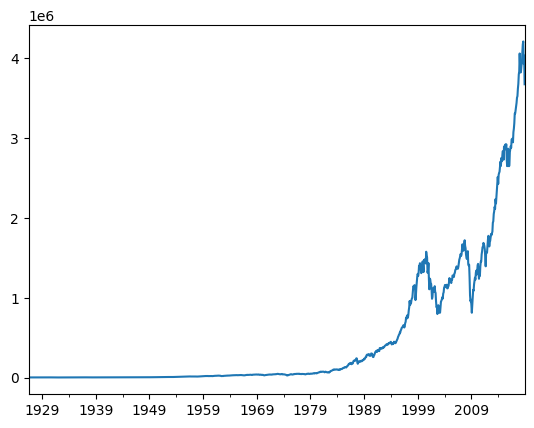

In [348]:
wealth_index.plot.line()

<Axes: >

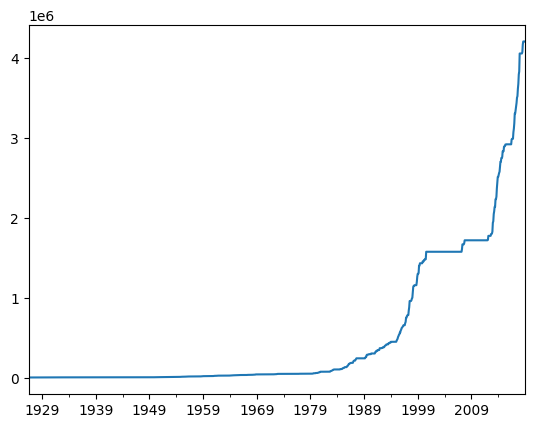

In [349]:
previous_peaks = wealth_index.cummax()

previous_peaks.plot()

In [350]:
drawdown = (wealth_index - previous_peaks) / previous_peaks

drawdown

1926-07    0.000000
1926-08    0.000000
1926-09    0.000000
1926-10   -0.024300
1926-11    0.000000
             ...   
2018-08    0.000000
2018-09    0.000000
2018-10   -0.065700
2018-11   -0.042062
2018-12   -0.127319
Freq: M, Name: LargeCap, Length: 1110, dtype: float64

<Axes: >

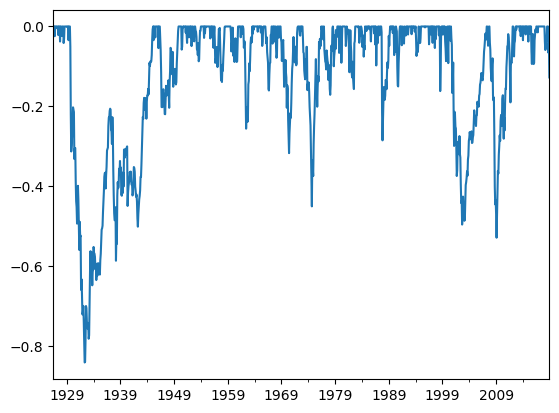

In [351]:
drawdown.plot()

In [352]:
drawdown.min()

-0.8400375277943123

In [353]:
drawdown["1975":].idxmin()

Period('2009-02', 'M')

In [354]:
drawdown.idxmin()

Period('1932-05', 'M')

In [355]:
def create_drawdown(returns_data: pd.Series, capital: int=1000):
    """
    Takes a time series of asset returns
    Computes and returns a DataFrame that contains:
        - the wealth index
        - the previous peaks
        - percent drawdowns
    """
    wealth_index = capital * (1 + returns_data).cumprod()
    previous_peaks = wealth_index.cummax()
    drawdown = (wealth_index - previous_peaks) / previous_peaks

    return pd.DataFrame(index=returns_data.index, data={
        "Drawdown": drawdown,
        "Peaks": previous_peaks,
        "Wealth Index": wealth_index
    })

         Drawdown         Peaks  Wealth Index
1926-07  0.000000  9.855000e+02  9.855000e+02
1926-08  0.000000  1.035958e+03  1.035958e+03
1926-09  0.000000  1.045592e+03  1.045592e+03
1926-10 -0.048400  1.045592e+03  9.949854e+02
1926-11 -0.055822  1.045592e+03  9.872245e+02
...           ...           ...           ...
2018-08  0.000000  2.298938e+09  2.298938e+09
2018-09 -0.016800  2.298938e+09  2.260316e+09
2018-10 -0.115317  2.298938e+09  2.033832e+09
2018-11 -0.147608  2.298938e+09  1.959597e+09
2018-12 -0.278109  2.298938e+09  1.659583e+09

[1110 rows x 3 columns]


<Axes: >

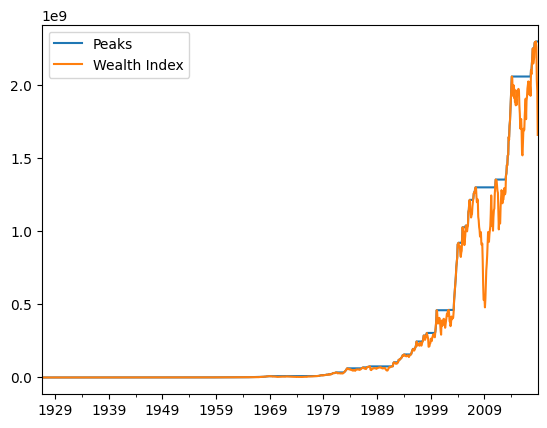

In [356]:
smallCaps = create_drawdown(returns["SmallCap"], 1000)

print(smallCaps)

smallCaps[["Peaks", "Wealth Index"]].plot()

1926-07    0.000000
1926-08    0.000000
1926-09    0.000000
1926-10   -0.048400
1926-11   -0.055822
             ...   
2018-08    0.000000
2018-09   -0.016800
2018-10   -0.115317
2018-11   -0.147608
2018-12   -0.278109
Freq: M, Name: Drawdown, Length: 1110, dtype: float64


<Axes: >

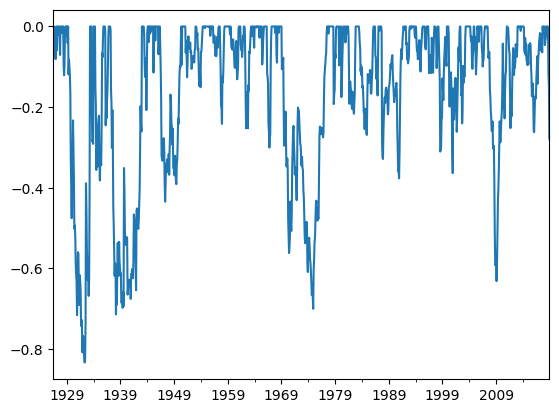

In [357]:
print(smallCaps["Drawdown"])

smallCaps["Drawdown"].plot()

<Axes: >

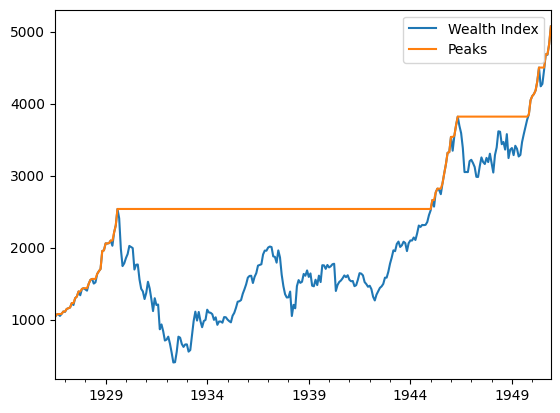

In [358]:
largeCapsPre1950 = create_drawdown(returns[:"1950"]["LargeCap"])

largeCapsPre1950[["Wealth Index", "Peaks"]].plot()

### Building Modules

In [359]:
import hello as h

ModuleNotFoundError: No module named 'hello'

In [216]:
h.message

'Hello Jim'

In [217]:
h.message

'Hello Jim'

In [218]:
import hello as h

In [219]:
h.message

'Hello Jim'

In [220]:
%load_ext autoreload

In [221]:
%autoreload 2

In [222]:
h.message

'Hello Jim'

In [223]:
h.message

'Hello Jane and Jim'

In [224]:
h.message

'Hello Jane and Jim and Kim'

In [225]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [226]:
import importlib
erk = importlib.import_module("edhec-risk-kit")

returns = erk.get_ffme_returns()

In [227]:
returns.head()

,SmallCap,LargeCap
1926-07,-0.0145,0.0329
1926-08,0.0512,0.0370
1926-09,0.0093,0.0067
1926-10,-0.0484,-0.0243
1926-11,-0.0078,0.0270


In [228]:
erk.create_drawdown(returns["SmallCap"])["Drawdown"].min()

-0.8330007793945303

In [229]:
erk.create_drawdown(returns["1975":]["SmallCap"])["Drawdown"].min()

-0.6312068077252386